In [1]:
import os
import xarray as xr
import numpy as np
import sys

from luccpy import calc

In [2]:
demo_y = xr.open_dataarray("test_data/demo_y.nc")
demo_x1 = xr.open_dataarray("test_data/demo_x1.nc")
demo_x2 = xr.open_dataarray("test_data/demo_x2.nc")

data_list = [demo_y,demo_x1,demo_x2]
variables = ["demo_y","demo_x1","demo_x2"]

In [3]:
calc.__all__

['calc_linregress',
 'calc_mk_test',
 'calc_bi_corr_rp',
 'calc_bi_pcorr_rp',
 'calc_corr_r',
 'linslope_spatial',
 'linslope_pval_spatial',
 'calc_sensity_spatial',
 'calc_maxshap_spatial']

In [4]:
demo_linr = calc.calc_linregress(demo_y)
demo_linr

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72)
Coordinates:
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    slope    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pvalue   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [5]:
demo_mk_test = calc.calc_mk_test(demo_y,alpha=0.05)
demo_mk_test

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72)
Coordinates:
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    trend    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pvalue   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    slope    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

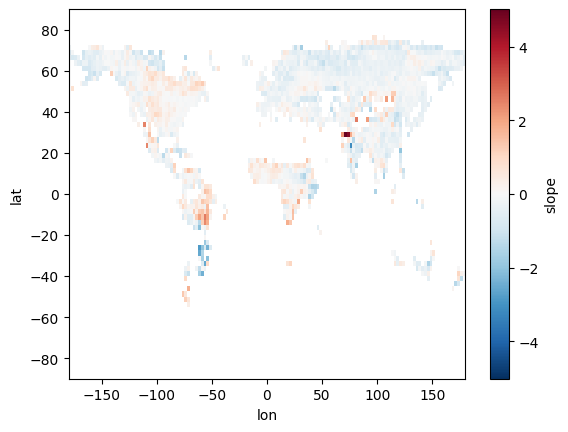

In [6]:
demo_mk_test.slope.plot()

In [7]:
demo_bi_corr_rp_spatial = calc.calc_bi_corr_rp(demo_y,demo_x1,dim="time",method="pearson")
demo_bi_corr_rp_spatial

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72)
Coordinates:
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    r        (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pvalue   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [8]:
demo_bi_pcorr_rp_spatial = calc.calc_bi_pcorr_rp(data_list,variables,x_name="demo_x1",y_name="demo_y",dim="time")
demo_bi_pcorr_rp_spatial

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72)
Coordinates:
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    r        (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pvalue   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [9]:
demo_calc_corr_r_spearman_spatial = calc.calc_corr_r(data_list,variables,dim="time",method="spearman",is_pcorr=False)
demo_calc_corr_r_spearman_spatial

<xarray.Dataset>
Dimensions:       (lon: 144, lat: 72)
Coordinates:
  * lon           (lon) float32 -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat           (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Data variables:
    demo_x1_corr  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    demo_x2_corr  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [10]:
demo_calc_corr_r_pcorr_spatial = calc.calc_corr_r(data_list,variables,dim="time",method="spearman",is_pcorr=True)
demo_calc_corr_r_pcorr_spatial

<xarray.Dataset>
Dimensions:       (lon: 144, lat: 72)
Coordinates:
  * lon           (lon) float32 -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat           (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Data variables:
    demo_x1_corr  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    demo_x2_corr  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [12]:
demo_calc_sensity_spatial = calc.calc_sensity_spatial(data_list,variables,y_name="demo_y",dim="time")
demo_calc_sensity_spatial

KeyboardInterrupt: 

In [12]:
demo_calc_maxshap_spatial = calc.calc_maxshap_spatial(data_list,variables,y_name="demo_y",dim="time")
demo_calc_maxshap_spatial

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72)
Coordinates:
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    maxshap  (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan